<a href="https://colab.research.google.com/github/Lorrayne23/Banco-de-dados-de-Gerenciamento-de-Corridas/blob/main/LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/repositorios/repositorios_populares.csv')
df.head()

,Unnamed: 0,Name,Age,Total Pull Requests,Total Releases,Updated,Primary Language,Closed Issues,Total Issues
0,0,freeCodeCamp/freeCodeCamp,2629,16802,0,28.0,JavaScript,15698,15828
1,1,996icu/996.ICU,1076,1063,0,5.0,None,0,0
2,2,EbookFoundation/free-programming-books,3068,4320,0,2.0,None,670,695
3,3,jwasham/coding-interview-university,2099,284,0,2.0,None,288,325
4,4,vuejs/vue,3142,1071,210,75.0,JavaScript,9363,9690


In [ ]:
repositorios_populares = df.drop(columns=['Unnamed: 0'])
repositorios_populares.head()

,Name,Age,Total Pull Requests,Total Releases,Updated,Primary Language,Closed Issues,Total Issues
0,freeCodeCamp/freeCodeCamp,2629,16802,0,28.0,JavaScript,15698,15828
1,996icu/996.ICU,1076,1063,0,5.0,None,0,0
2,EbookFoundation/free-programming-books,3068,4320,0,2.0,None,670,695
3,jwasham/coding-interview-university,2099,284,0,2.0,None,288,325
4,vuejs/vue,3142,1071,210,75.0,JavaScript,9363,9690


In [ ]:
# Análise de dados Pandas

# resumo das informações do data frame
repositorios_populares.describe() 


,Age,Total Pull Requests,Total Releases,Updated,Closed Issues,Total Issues
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2507.048000,2130.166000,61.370000,210.427000,2845.767000,3247.569000
std,980.494106,6245.536304,127.237418,227.849468,6398.180798,7031.444578
min,211.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1818.500000,111.000000,0.000000,50.000000,154.750000,243.000000
50%,2487.500000,413.500000,16.000000,144.500000,925.000000,1151.500000
75%,3148.250000,1398.500000,75.000000,286.250000,3060.000000,3451.250000
max,5077.000000,97753.000000,1585.000000,1404.000000,124029.000000,129585.000000


In [ ]:
# Tipo de dados de cada coluna
repositorios_populares.dtypes

Name                    object
Age                      int64
Total Pull Requests      int64
Total Releases           int64
Updated                float64
Primary Language        object
Closed Issues            int64
Total Issues             int64
dtype: object

In [ ]:
# Quantidade total de linhas e colunas
repositorios_populares.shape

(1000, 8)

count    1000.000000
mean     2507.048000
std       980.494106
min       211.000000
25%      1818.500000
50%      2487.500000
75%      3148.250000
max      5077.000000
Name: Age, dtype: float64


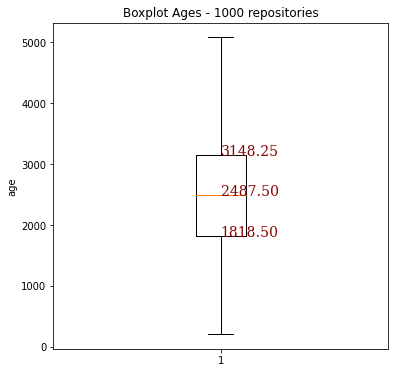

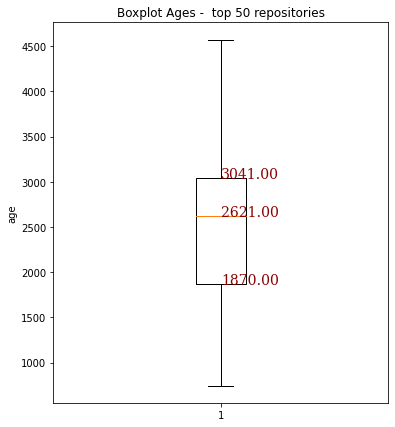

In [ ]:
# RQ 01. Sistemas populares são maduros/antigos?


# Análise de Dados

age = repositorios_populares['Age']
age_describe = age.describe()

print(age.describe())


# Gráfico

repositorios_populares_50 = repositorios_populares.head(50)

age_50 = repositorios_populares_50['Age']
age_50_describe = age_50.describe()

q1 = age_describe['25%']
mediana = age_describe['50%']
q2 = age_describe['75%']

s_q1 = "{0:.2f}".format(q1)
s_mediana = "{0:.2f}".format(mediana)
s_q2 = "{0:.2f}".format(q2)


q1_50 = age_50_describe['25%']
mediana_50 = age_50_describe['50%']
q2_50 = age_50_describe['75%']


s_q1_50 = "{0:.2f}".format(q1_50)
s_mediana_50 = "{0:.2f}".format(mediana_50)
s_q2_50 =  "{0:.2f}".format(q2_50)


font_1 = {'family': 'serif', 'color': 'darkred', 'size':'14'}

plt.figure(figsize=(6, 6))
plt.boxplot(age)
plt.title('Boxplot Ages - 1000 repositories')
plt.ylabel('age')
plt.text(1, q1, s_q1, fontdict=font_1)
plt.text(1, mediana, s_mediana, fontdict=font_1)
plt.text(1, q2, s_q2, fontdict=font_1)
plt.savefig('age-1000.png', format='png')
plt.show()

plt.figure(figsize=(6, 7))
plt.boxplot(age_50)
plt.title('Boxplot Ages -  top 50 repositories')
plt.ylabel('age')
plt.text(1, q1_50, s_q1_50, fontdict=font_1)
plt.text(1, mediana_50, s_mediana_50, fontdict=font_1)
plt.text(1, q2_50, s_q2_50, fontdict=font_1)
fig.savefig('age-50.png', format='png')
plt.show()



count     1000.000000
mean      2130.166000
std       6245.536304
min          0.000000
25%        111.000000
50%        413.500000
75%       1398.500000
max      97753.000000
Name: Total Pull Requests, dtype: float64


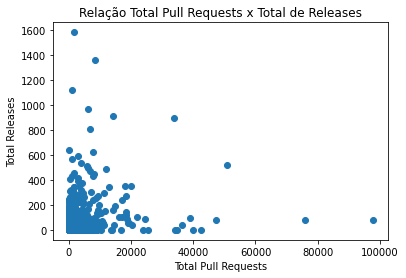

In [ ]:
# RQ 02. Sistemas populares recebem muita contribuição externa?

print(repositorios_populares['Total Pull Requests'].describe())


plt.scatter(repositorios_populares['Total Pull Requests'],repositorios_populares['Total Releases'])
plt.xlabel('Total Pull Requests')
plt.ylabel('Total Releases')
plt.title('Relação Total Pull Requests x Total de Releases')
plt.savefig('Total Pull Requests x Total de Releases.png', format='png')





In [ ]:
# RQ 03. Sistemas populares lançam releases com frequência?


# Análise de dados
releases = repositorios_populares['Total Releases']
releases_describe = releases.describe()
print(releases)
print(releases_describe)





valores_unicos_releases = repositorios_populares['Total Releases'].unique()
top_50 = repositorios_populares.head(50)

print(valores_unicos_releases)



repositories_0_100 =((repositorios_populares['Total Releases'] >=0 )& (repositorios_populares['Total Releases'] <=100)).sum()
repositories_100_500 = ((repositorios_populares['Total Releases'] >100) & (repositorios_populares['Total Releases'] <=500)).sum()
repositories_500_1000 = ((repositorios_populares['Total Releases'] >500) & (repositorios_populares['Total Releases'] <=1000)).sum()
repositories_1000_2000 = ((repositorios_populares['Total Releases'] >1000) & (repositorios_populares['Total Releases'] <=2000)).sum()

repositories2_0_100 =((top_50['Total Releases'] >=0 )& (top_50['Total Releases'] <=100)).sum()
repositories2_100_500 = ((top_50['Total Releases'] >100) & (top_50['Total Releases'] <=500)).sum()
repositories2_500_1000 = ((top_50['Total Releases'] >500) & (top_50['Total Releases'] <=1000)).sum()
repositories2_1000_2000 = ((top_50['Total Releases'] >1000) & (top_50['Total Releases'] <=2000)).sum()




lista_repositories_1000 = [repositories_0_100, repositories_100_500, repositories_500_1000,repositories_1000_2000]
lista_repositories_50 = [repositories2_0_100, repositories2_100_500, repositories2_500_1000,repositories2_1000_2000]
stages=["0 a 100 relases", "Mais de 100 realeases até 500 releases", "Mais de 500 releases até 1000 releases", "Mais de 1000 releases até 2000 releases"]

df_1000 = pd.DataFrame(dict(number=lista_repositories_1000, stage=stages))
df_50 = pd.DataFrame(dict(number=lista_repositories_50, stage=stages))

df_1000['Tamanho Amostra'] = '100 repositórios'
df_50['Tamanho Amostra'] = ' 50 repositórios'
df = pd.concat([df_1000, df_50], axis=0)
fig = px.funnel(df, x='number', y='stage', color='Tamanho Amostra')
plt.savefig('repositories-releases.png', format='png')
fig.show()




0        0
1        0
2        0
3        0
4      210
      ... 
995      0
996      0
997     14
998      0
999      0
Name: Total Releases, Length: 1000, dtype: int64
count    1000.000000
mean       61.370000
std       127.237418
min         0.000000
25%         0.000000
50%        16.000000
75%        75.000000
max      1585.000000
Name: Total Releases, dtype: float64
[   0  210   96  158   76   61  341    1  186  910  177   82    4   34
    3  518  276 1366   67  165  145  130  152  449   85  344   49   22
   21   56  971   99   44   17   29  101   36   27  376   57  125   10
   88   38   77   37   51   16   66  181  536   86  144   20    2   60
   47   11   35  191   55   68   28   92  106   32   71  138   25  894
   98  153   26  273   39  279  222  172  227   63   69   84  102  215
  289  114  119    8   14  319   79  209   72  180  293  148  498  150
  247   45   58   41   62  116  155  105   75   91   15  355   46  261
  118   78  147  128  103  515  243   13  419  189   40  

<Figure size 432x288 with 0 Axes>

count    1000.000000
mean      210.427000
std       227.849468
min         0.000000
25%        50.000000
50%       144.500000
75%       286.250000
max      1404.000000
Name: Updated, dtype: float64


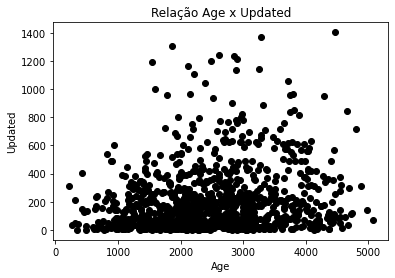

In [ ]:
# RQ 04. Sistemas populares são atualizados com frequência?


updated= repositorios_populares['Updated']
updated_desc = updated.describe()
print(updated_desc)


plt.scatter(x=repositorios_populares['Age'],y=repositorios_populares['Updated'] , c='k')

plt.xlabel("Age")
plt.ylabel("Updated")
plt.title('Relação Age x Updated')

plt.savefig('Age x Updated.png', format='png')



plt.show()

JavaScript          239
None                115
Python              108
TypeScript           95
Go                   72
Java                 71
C++                  50
C                    30
Shell                22
HTML                 22
Swift                18
Rust                 18
Ruby                 17
PHP                  14
Jupyter Notebook     14
Kotlin               12
C#                   12
CSS                  11
Vue                   8
Vim script            6
Objective-C           5
Haskell               4
Lua                   3
TeX                   3
Markdown              3
Dart                  3
CoffeeScript          2
Elixir                2
Makefile              2
Clojure               2
SCSS                  2
Scala                 1
Julia                 1
Dockerfile            1
V                     1
Roff                  1
Jinja                 1
Batchfile             1
Emacs Lisp            1
OCaml                 1
Standard ML           1
Nunjucks        

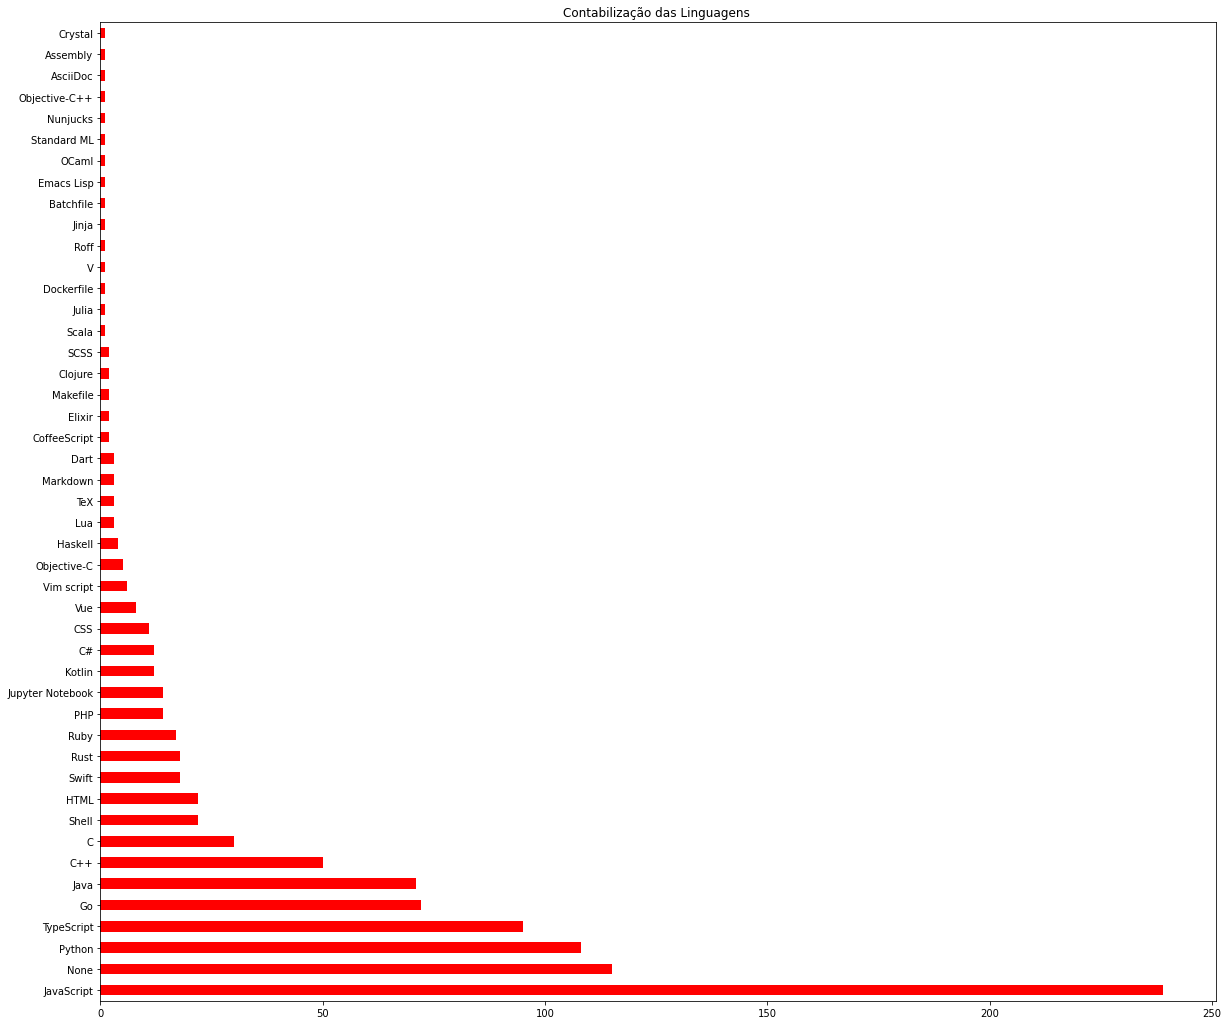

In [ ]:
# RQ 05. Sistemas populares são escritos nas linguagens mais populares ? OK

language = repositorios_populares['Primary Language'].value_counts()
language.plot(kind='barh',figsize=(20, 18),color='red')
plt.title('Contabilização das Linguagens ')
plt.savefig('repositories-languages.png', format='png')
print(language)



In [ ]:
language = repositorios_populares['Primary Language'].value_counts()

print(type(language))

<class 'pandas.core.series.Series'>


2845767
3247569
count      1000.000000
mean       2845.767000
std        6398.180798
min           0.000000
25%         154.750000
50%         925.000000
75%        3060.000000
max      124029.000000
Name: Closed Issues, dtype: float64


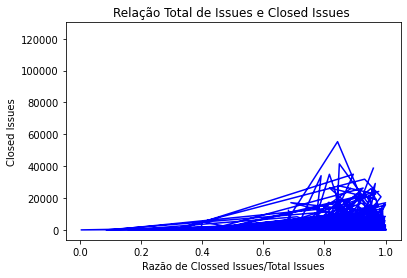

In [ ]:
# RQ 06. Sistemas populares possuem um alto percentual de issues fechadas?

print(sum(repositorios_populares['Closed Issues']))
print(sum(repositorios_populares['Total Issues']))
print(repositorios_populares['Closed Issues'].describe())

plt.plot(repositorios_populares['Closed Issues']/repositorios_populares['Total Issues'],repositorios_populares['Closed Issues'],'b-')


plt.title("Relação Total de Issues e Closed Issues ")
plt.xlabel("Razão de Clossed Issues/Total Issues")
plt.ylabel("Closed Issues")
plt.savefig('Relação Total de Issues e Closed Issues.png', format='png')


plt.show()




